# Most Expensive Football Transfers
The following is a list of most expensive association football transfers, which details the highest transfer fees ever paid for players, as well as transfers which set new world transfer records.

This data contains top 50 transfers based on paid fees.

Columns:

<ul><li>Rank: Rank of transfer</li>

<li>Origin : Origin Country of Player</li>

<li>Player : Player Name</li>

<li>From(Country) : From which country the player transferred?</li>

<li>From(Club) : From which Club the player transferred?</li>

<li>To(Country) : To which country the player transferred?</li>

<li>To(Club) : To which Club the player transferred?</li>

<li>Position : Position of The player</li>

<li>Fee(€ mln) : How much fee were paid for the transfer as € mln.</li>

<li>Fee(£ mln) : How much fee were paid for the transfer as £ mln.</li>

<li>Year : In which year the transfer occured?</li>

<li>Born : When was the player born?</li></ul>

In [18]:
# loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# loading the dataset file
df = pd.read_csv('/content/football_players.csv')
df.head()

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,£198,2017,1992
1,2,France,Kylian Mbappé,France,Monaco,France,Paris Saint-Germain,Forward,180.0,£163,2018,1998
2,3,Brazil,Philippe Coutinho,England,Liverpool,Spain,Barcelona,Midfielder,145.0,£105,2018,1992
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999
4,5,France,Antoine Griezmann,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,£107,2019,1991


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           54 non-null     int64  
 1   Origin         54 non-null     object 
 2   Player         54 non-null     object 
 3   From(Country)  54 non-null     object 
 4   From(Club)     54 non-null     object 
 5   To(Country)    54 non-null     object 
 6   To(Club)       54 non-null     object 
 7   Position       54 non-null     object 
 8   Fee(€ mln)     54 non-null     float64
 9   Fee(£ mln)     54 non-null     object 
 10  Year           54 non-null     int64  
 11  Born           54 non-null     int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 5.2+ KB


Observation: column 'Fee(£ mln)' is object type as it contains '£' symbol.
Next step:
<ul><li>Remove '£' from every row of column 'Fee (£ mln)'.</li>
<li>Convert columns 'Fee (£ mln)' t float type. </li></ul>

In [21]:
# Delete £
df['Fee(£ mln)'] = df['Fee(£ mln)'].str.replace('£','')

# Convert Fee (£ mln) to float
df['Fee(£ mln)'] = df['Fee(£ mln)'].astype('float')
df.head()

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,198.0,2017,1992
1,2,France,Kylian Mbappé,France,Monaco,France,Paris Saint-Germain,Forward,180.0,163.0,2018,1998
2,3,Brazil,Philippe Coutinho,England,Liverpool,Spain,Barcelona,Midfielder,145.0,105.0,2018,1992
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,104.1,2019,1999
4,5,France,Antoine Griezmann,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,107.0,2019,1991


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           54 non-null     int64  
 1   Origin         54 non-null     object 
 2   Player         54 non-null     object 
 3   From(Country)  54 non-null     object 
 4   From(Club)     54 non-null     object 
 5   To(Country)    54 non-null     object 
 6   To(Club)       54 non-null     object 
 7   Position       54 non-null     object 
 8   Fee(€ mln)     54 non-null     float64
 9   Fee(£ mln)     54 non-null     float64
 10  Year           54 non-null     int64  
 11  Born           54 non-null     int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 5.2+ KB


In [23]:
# checking null values
df.isnull().sum()

Rank             0
Origin           0
Player           0
From(Country)    0
From(Club)       0
To(Country)      0
To(Club)         0
Position         0
Fee(€ mln)       0
Fee(£ mln)       0
Year             0
Born             0
dtype: int64

In [24]:
df['Origin'].value_counts()

France                    9
Portugal                  6
Brazil                    6
Belgium                   4
England                   4
Spain                     3
Argentina                 3
Netherlands               3
Colombia                  2
Uruguay                   2
Guinea                    1
Ivory Coast               1
Gabon                     1
Wakes                     1
Nigeria                   1
United States             1
Bosnia and Herzegovina    1
Algeria                   1
Germany                   1
Sweden                    1
Morocco                   1
Serbia                    1
Name: Origin, dtype: int64

In [25]:
# Combining all the nations having value as 1 into 'Others' in 'Origin' column and putting it in another data frame for visualisation
df1 = df['Origin'].value_counts()
condition = df1 > 2
other = (~condition).sum()

In [26]:
df1 = df1[condition]
df1 = df1.append(pd.Series({'Oher' : other}))
df1

France          9
Portugal        6
Brazil          6
Belgium         4
England         4
Spain           3
Argentina       3
Netherlands     3
Oher           14
dtype: int64

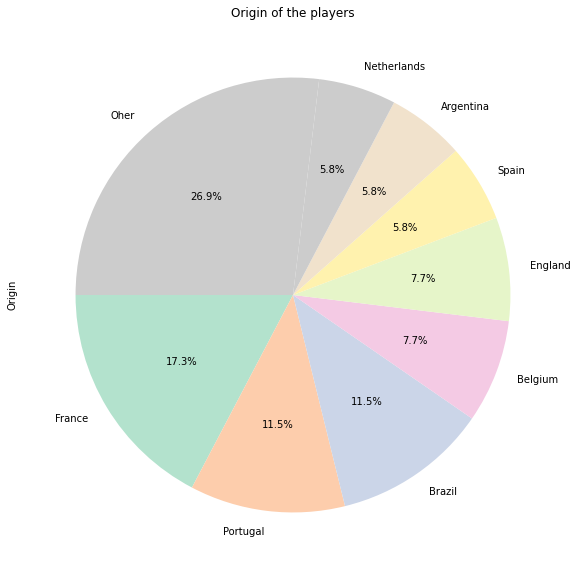

In [27]:
# plotting
plot1 = df1.plot.pie(y = df1, title = 'Origin of the players', figsize = (15,10), colormap = 'Pastel2', ylabel = 'Origin', startangle = 180, autopct = '%1.1f%%')

In [28]:
df2 = df[['Fee(€ mln)', 'To(Club)', 'Year']]
df2.head()

,Fee(€ mln),To(Club),Year
0,222.0,Paris Saint-Germain,2017
1,180.0,Paris Saint-Germain,2018
2,145.0,Barcelona,2018
3,126.0,Atlético Madrid,2019
4,120.0,Barcelona,2019


As most of the signings are from club 'Paris Saint-Germain'
We will compare Paris Saint-Germain with other clubs on the basis of fee paid.

In [29]:
x = df2['Year']
y = df2['Fee(€ mln)']
condition = df2['To(Club)'] != 'Paris Saint-Germain'

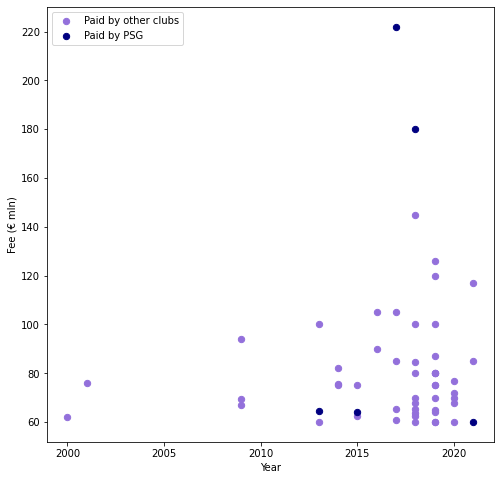

In [30]:
plt.figure(figsize = (8,8))
plt.scatter(x[condition], y[condition], c = 'mediumpurple', s = 40, label = 'Paid by other clubs')
plt.scatter(x[~condition], y[~condition], c = 'navy', s = 40, label = 'Paid by PSG')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Fee (€ mln)')
plt.show()

Now we will observe the players positions with respect to the fees

In [31]:
df3 = df.groupby('Position')['Fee(€ mln)'].sum()
df3 = df3.sort_values(ascending = False)
df3.head

<bound method NDFrame.head of Position
Midfielder    1551.6
Forward       1491.3
Striker        720.5
Defender       584.7
Goalkeeper     142.5
Name: Fee(€ mln), dtype: float64>

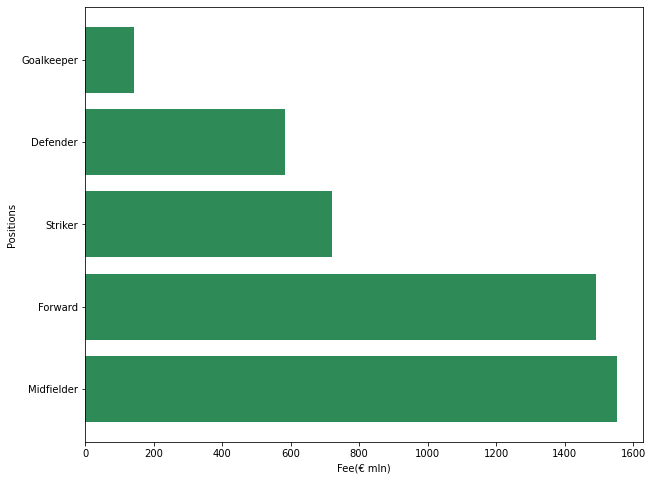

In [32]:
# now we will plot it
plt.figure(figsize = (10,8))
plt.barh(df3.index, df3, color = 'seagreen')
plt.ylabel('Positions')
plt.xlabel('Fee(€ mln)')
plt.show()

Clubs with highest revenues

In [33]:
df4 = df.groupby('From(Club)', as_index= False, sort= True,)['Fee(€ mln)'].sum()
df4 = df4.sort_values('Fee(€ mln)', ascending = False) 
df4.head()

,From(Club),Fee(€ mln)
4,Barcelona,356.0
3,Atlético Madrid,330.0
19,Monaco,325.0
7,Borussia Dortmund,317.7
12,Juventus,306.0


Text(0.5, 1.0, 'Top 10 Clubs with highest revenues')

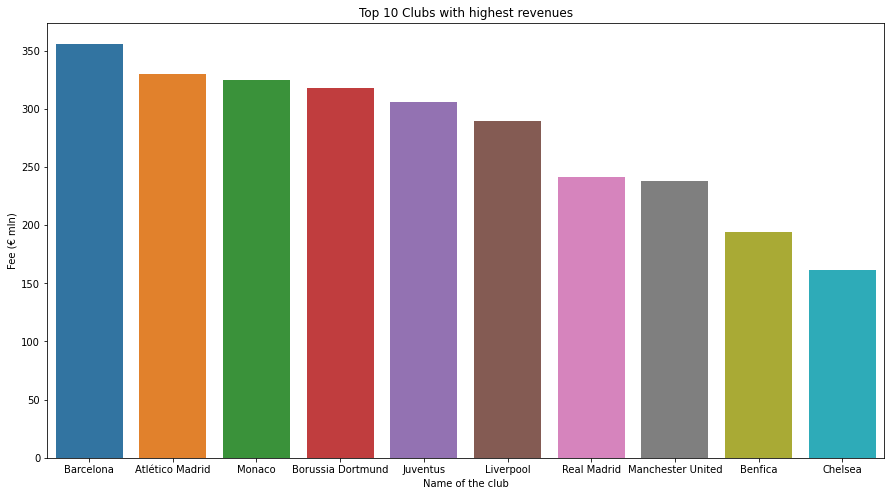

In [37]:
# plot
df4= df4[0:10]
plt.figure(figsize= (15,8))
sns.barplot(data = df4, x= 'From(Club)', y= 'Fee(€ mln)')
plt.ylabel('Fee (€ mln)')
plt.xlabel('Name of the club')
plt.title('Top 10 Clubs with highest revenues')

Club that spent the most

In [35]:
df5= df.groupby('To(Club)', as_index= False, sort= True)['Fee(€ mln)'].sum()
df5= df5.sort_values('Fee(€ mln)', ascending= False)
df5.head()

,To(Club),Fee(€ mln)
2,Barcelona,656.8
13,Real Madrid,634.0
8,Manchester City,590.5
12,Paris Saint-Germain,590.5
9,Manchester United,437.6


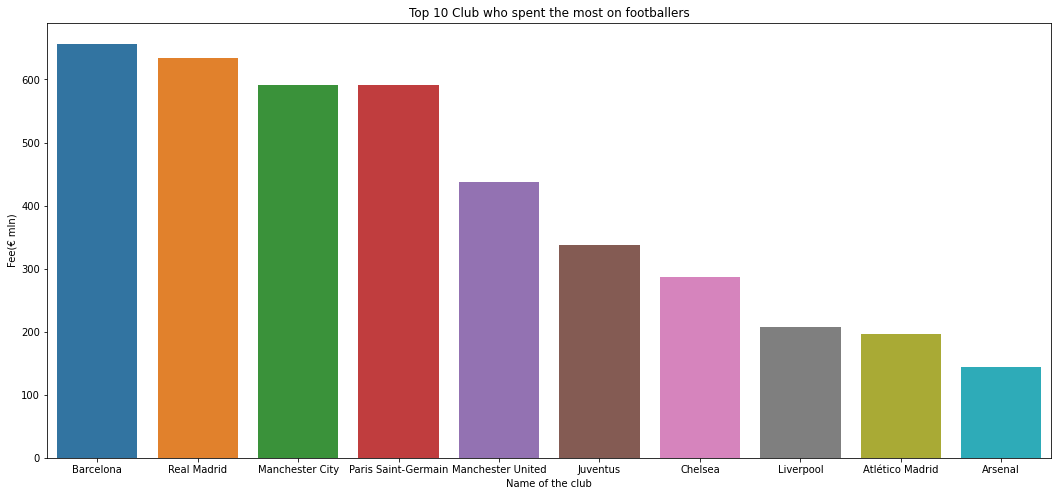

In [36]:
# plot
df5= df5[0:10]
plt.figure(figsize= (18,8))
sns.barplot(data= df5, x= 'To(Club)', y='Fee(€ mln)')
plt.xlabel('Name of the club')
plt.ylabel('Fee(€ mln)')
plt.title('Top 10 Club who spent the most on footballers')
plt.show()

Top 5 origins of the most expensive players

In [39]:
df5= df.groupby('Origin', as_index= False, sort= True)['Fee(€ mln)'].sum()
df5= df5.sort_values('Fee(€ mln)', ascending= False)
df5.head()

,Origin,Fee(€ mln)
7,France,861.2
4,Brazil,629.5
15,Portugal,515.0
6,England,351.5
2,Belgium,340.0


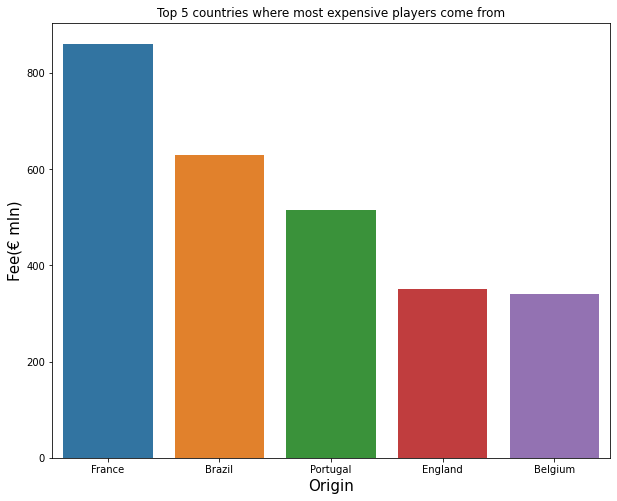

In [45]:
# plot
df5= df5[0:5]
plt.figure(figsize= (10,8))
sns.barplot(data = df5, x= 'Origin', y= 'Fee(€ mln)')
plt.xlabel('Origin', fontsize= 15)
plt.ylabel('Fee(€ mln)', fontsize= 15)
plt.title('Top 5 countries where most expensive players come from')
plt.show()


Let's check the average price of a player depending on his position

In [46]:
df6= df.groupby('Position', as_index= False, sort= True)['Fee(€ mln)'].sum()
df6= df6.sort_values('Fee(€ mln)', ascending= False)
df6.head()

,Position,Fee(€ mln)
3,Midfielder,1551.6
1,Forward,1491.3
4,Striker,720.5
0,Defender,584.7
2,Goalkeeper,142.5


In [49]:
df7= df['Position'].value_counts()
df7= pd.DataFrame(df7)
df7.columns= ['Count']
df7

,Count
Midfielder,20
Forward,14
Striker,10
Defender,8
Goalkeeper,2


In [52]:
df6['Count']= df7['Count'].values
df6['Average Price']= df6['Fee(€ mln)']/df6['Count']
df6

,Position,Fee(€ mln),Count,Average Price
3,Midfielder,1551.6,20,77.580000
1,Forward,1491.3,14,106.521429
4,Striker,720.5,10,72.050000
0,Defender,584.7,8,73.087500
2,Goalkeeper,142.5,2,71.250000
